In [17]:
import numpy as np
import pandas as pd
from numpy.random import *
from scipy.stats import uniform
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import scipy

In [18]:
data = pd.DataFrame(data=[4,3,4,5,5,2,3,1,4,0,1,5,5,6,5,4,4,5,3,4], columns=['y'])
data['N'] = np.ones(20, dtype=np.int) * 8

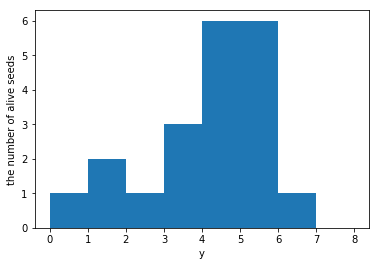

In [32]:
plt.hist(data['y'], bins=range(9))
plt.xlabel('y')
plt.ylabel('the number of alive seeds')
plt.show()

In [20]:
def loglikelihood(d, q):
    return np.sum(np.log(scipy.special.comb(d['N'], d['y'])) + d['y'] * math.log(q) + (d['N'] - d['y'])*math.log(1 - q))

In [21]:
def random_normal(epochs, pi=0, sigma=0.01):
    return np.random.normal(pi, sigma, epochs)
    

# メトロポリス法
def metropolis(data, start, epochs):
    q_cur = start
    ll_cur = loglikelihood(data, q_cur)
    q = [q_cur]
    for e, r in zip(random_normal(epochs, sigma=0.5), np.random.random(epochs)):
        q_new = q_cur + e
        q_new = min(max(0.0001, q_new), 0.9999)
        ll_new = loglikelihood(data, q_new)
        if ll_new > ll_cur or math.exp(ll_new - ll_cur) > r:
            q_cur = q_new
            ll_cur = ll_new
        q.append(q_cur)
    return q
    

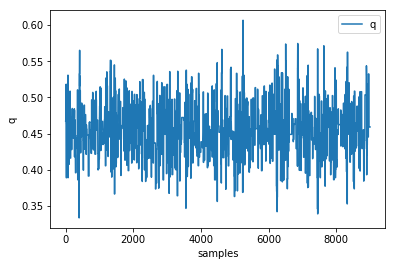

In [22]:
q_sample = metropolis(data, 0.1, 10000)
q_sample = q_sample[1000:] # burn-in
plt.plot(np.arange(len(q_sample)), q_sample, label='q')
plt.legend()
plt.xlabel('samples')
plt.ylabel('q')
plt.show()

<Container object of 41 artists>

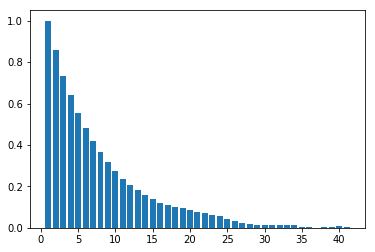

In [23]:
# correlogram
cor = sm.tsa.stattools.acf(q_sample)
x = np.arange(1, len(cor) + 1)
plt.bar(x, cor)

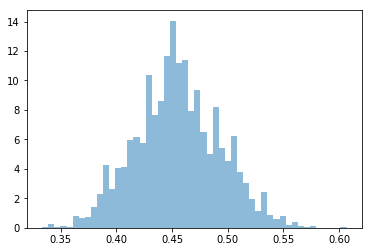

In [24]:
plt.hist(q_sample, bins=50, histtype="stepfilled", normed=True, alpha=0.5)
plt.show()